# Project: Investigate a TMDB-MOVIES Dataset

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#objective">Objective</a></li>
<li><a href="#questions">Questions</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> This data set contains information about 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue. Certain columns, like ‘cast’ and ‘genres’, contain multiple values separated by pipe (|) characters. There are some odd characters in the ‘cast’ column. Don’t worry about cleaning them. You can leave them as is. The final two columns ending with “_adj” show the budget and revenue of the associated movie in terms of 2010 dollars, accounting for inflation over time.

<a id='objective'></a>
## Objective
> As a moviegoer, I am not only getting hocked by the story line, cinematography and cast performance of a movie but also I would like to pay more attention to define a successful movie in terms of commercial aspect. Because there will be no one want to invest in a film production without getting a clear picture of how profitable it would be as launching them out aka Return of investment (ROI). Based on that, we may find features that can partially relate to its economic success in this dataset. The final objective is finding aspects to make the next blockbuster movie which is substantially profitable.

<a id='questions'></a>
## Questions

>Q1. How the numerical variables distribution are in the dataset? Make this help to lay the foundation of understanding of the data we have. 

>Q2. How many movies has been commercially successful in this dataset?

>Q3. Which are top 10 directors who frequently directed successful movies?

>Q4. Which are top 10 movies in term of revenue?

>Q5. How is typically the runtime of successful movies? 

>Q6. Which year does have the highest number of successful movies release?

>Q7. What are the top frequent genres were made? And How is the financial performance of the genres?

>Q8. What are the top 10 frequent casts? And How is the financial performance of them?

>Q9. How do the vote average score and vote count relate to the revenue of the movies?

>Q10. What are words most used in tagline?


In [2]:
# Import packages that plan to use
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

<a id='wrangling'></a>
## Data Wrangling

In [3]:
# Load the dataset
df_raw = pd.read_csv('tmdb-movies.csv')
df_raw.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [4]:
df_raw.tail()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
10861,21,tt0060371,0.080598,0,0,The Endless Summer,Michael Hynson|Robert August|Lord 'Tally Ho' B...,NaN,Bruce Brown,NaN,...,"The Endless Summer, by Bruce Brown, is one of ...",95,Documentary,Bruce Brown Films,6/15/66,11,7.4,1966,0.000000,0.0
10862,20379,tt0060472,0.065543,0,0,Grand Prix,James Garner|Eva Marie Saint|Yves Montand|Tosh...,NaN,John Frankenheimer,Cinerama sweeps YOU into a drama of speed and ...,...,Grand Prix driver Pete Aron is fired by his te...,176,Action|Adventure|Drama,Cherokee Productions|Joel Productions|Douglas ...,12/21/66,20,5.7,1966,0.000000,0.0
10863,39768,tt0060161,0.065141,0,0,Beregis Avtomobilya,Innokentiy Smoktunovskiy|Oleg Efremov|Georgi Z...,NaN,Eldar Ryazanov,NaN,...,An insurance agent who moonlights as a carthie...,94,Mystery|Comedy,Mosfilm,1/1/66,11,6.5,1966,0.000000,0.0
10864,21449,tt0061177,0.064317,0,0,"What's Up, Tiger Lily?",Tatsuya Mihashi|Akiko Wakabayashi|Mie Hama|Joh...,NaN,Woody Allen,WOODY ALLEN STRIKES BACK!,...,"In comic Woody Allen's film debut, he took the...",80,Action|Comedy,Benedict Pictures Corp.,11/2/66,22,5.4,1966,0.000000,0.0
10865,22293,tt0060666,0.035919,19000,0,Manos: The Hands of Fate,Harold P. Warren|Tom Neyman|John Reynolds|Dian...,NaN,Harold P. Warren,It's Shocking! It's Beyond Your Imagination!,...,A family gets lost on the road and stumbles up...,74,Horror,Norm-Iris,11/15/66,15,1.5,1966,127642.279154,0.0


In [5]:
# Check how many columns, rows of the dataset are.
print(f" There are {df_raw.shape[0]} rows in the dataset.")
print(f" There are {df_raw.shape[1]} columns in the dataset.")

 There are 10866 rows in the dataset.
 There are 21 columns in the dataset.


In [6]:
# Check the data type and information of the dataset
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

- Following columns will be dropped due to not being in the circle of the analysis : id, imdb_id, hompage, keywords, overview, budget_adj, revenue_adj, popularity, production_companies, release_date

In [7]:
# Dropout columns not being used in the analysis
df_raw.drop(columns=['id', 'imdb_id', 'homepage', 'keywords', 'overview', 'budget_adj', 'revenue_adj', 'popularity', 'production_companies', 'release_date'], inplace=True, axis=1)
df_raw.head()

,budget,revenue,original_title,cast,director,tagline,runtime,genres,vote_count,vote_average,release_year
0,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,The park is open.,124,Action|Adventure|Science Fiction|Thriller,5562,6.5,2015
1,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,What a Lovely Day.,120,Action|Adventure|Science Fiction|Thriller,6185,7.1,2015
2,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,One Choice Can Destroy You,119,Adventure|Science Fiction|Thriller,2480,6.3,2015
3,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,Every generation has a story.,136,Action|Adventure|Science Fiction|Fantasy,5292,7.5,2015
4,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,Vengeance Hits Home,137,Action|Crime|Thriller,2947,7.3,2015


In [8]:
df_raw.tail()

,budget,revenue,original_title,cast,director,tagline,runtime,genres,vote_count,vote_average,release_year
10861,0,0,The Endless Summer,Michael Hynson|Robert August|Lord 'Tally Ho' B...,Bruce Brown,NaN,95,Documentary,11,7.4,1966
10862,0,0,Grand Prix,James Garner|Eva Marie Saint|Yves Montand|Tosh...,John Frankenheimer,Cinerama sweeps YOU into a drama of speed and ...,176,Action|Adventure|Drama,20,5.7,1966
10863,0,0,Beregis Avtomobilya,Innokentiy Smoktunovskiy|Oleg Efremov|Georgi Z...,Eldar Ryazanov,NaN,94,Mystery|Comedy,11,6.5,1966
10864,0,0,"What's Up, Tiger Lily?",Tatsuya Mihashi|Akiko Wakabayashi|Mie Hama|Joh...,Woody Allen,WOODY ALLEN STRIKES BACK!,80,Action|Comedy,22,5.4,1966
10865,19000,0,Manos: The Hands of Fate,Harold P. Warren|Tom Neyman|John Reynolds|Dian...,Harold P. Warren,It's Shocking! It's Beyond Your Imagination!,74,Horror,15,1.5,1966


In [9]:
#Checking the descriptive statistics of numerical variables
df_raw.describe()

,budget,revenue,runtime,vote_count,vote_average,release_year
count,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000
mean,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658
std,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941
min,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000
25%,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000
50%,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000
75%,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000
max,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000


- There are movies in which has zero budget, or zero revenue. These is not valuable at the purpose of analyzing commercial aspects of this report. Therefore, those values with zero commercial information will be droped out.
- Min runtime is zero which means the movie length was posibly input wrong. The maximum runtine in movie is 900 min which is subtatianlly long one. Let's have a look on that maxium 900 min movie.

In [10]:
# Subset to movie where the runtime is 900min.
df_raw[df_raw['runtime'] == 900]

,budget,revenue,original_title,cast,director,tagline,runtime,genres,vote_count,vote_average,release_year
3894,0,0,The Story of Film: An Odyssey,Mark Cousins|Jean-Michel Frodon|Cari Beauchamp...,Mark Cousins,NaN,900,Documentary,14,9.2,2011


The 900 min is "The Story of Film: An Odyssey" which is a documentary series with 15 episodes. Therefore, this movie is valid for the total cummulative of the length of 15 eps. 
>https://en.wikipedia.org/wiki/The_Story_of_Film:_An_Odyssey#:~:text=The%20Story%20of%20Film%3A%20An%20Odyssey%20is%20a%202011%20British,book%20The%20Story%20of%20Film.

In [11]:
# Subset to movies where the runtime is 0min.
movie_0_runtime = df_raw[df_raw['runtime'] == 0]
movie_0_runtime

,budget,revenue,original_title,cast,director,tagline,runtime,genres,vote_count,vote_average,release_year
92,0,0,Mythica: The Necromancer,Melanie Stone|Adam Johnson|Kevin Sorbo|Nicola ...,A. Todd Smith,NaN,0,Fantasy|Action|Adventure,11,5.4,2015
334,0,0,Ronaldo,Cristiano Ronaldo,Anthony Wonke,Astonishing. Intimate. Definitive.,0,Documentary,80,6.5,2015
410,0,0,Anarchy Parlor,Robert LaSardo|Jordan James Smith|Sara Fabel|T...,Kenny Gage|Devon Downs,NaN,0,Horror,15,5.6,2015
445,0,0,The Exorcism of Molly Hartley,Sarah Lind|Devon Sawa|Gina Holden|Peter MacNei...,Steven R. Monroe,NaN,0,Horror,52,5.0,2015
486,0,0,If There Be Thorns,Heather Graham|Jason Lewis|Rachael Carpani|Mas...,Nancy Savoca,NaN,0,TV Movie|Drama,11,5.4,2015
595,0,0,Deep Dark,Sean McGrath|Denise Poirier|Anne Sorce|Tabor H...,Michael Medaglia,NaN,0,Horror,11,4.6,2015
616,0,0,The Outfield,Cameron Dallas|Hamilton Nash Grier|Olivia Stuc...,Michael Goldfine,NaN,0,Drama|Comedy,20,6.6,2015
1241,0,0,Dance-Off,Kathryn McCormick|Shane Harper|Finola Hughes|C...,NaN,NaN,0,Romance|Music|Comedy,18,5.7,2014
1289,3250000,0,Treehouse,J. Michael Trautmann|Dana Melanie|Daniel Fredr...,Michael G. Bartlett,No kids allowed,0,Thriller|Horror|Mystery,16,3.4,2014
1293,0,0,Tim Maia,Robson Nunes|BabÃº Santana|Alinne Moraes|CauÃ£...,Mauro Lima,Original language PORTUGUESE,0,Documentary|Drama|Music,14,6.0,2014


In [12]:
# Check how movies have 0 runtime
df_raw[df_raw['runtime'] == 0].shape[0]

31

There are 31 movies with the runtime is zero. And most of them has zero on revenue. That will not contribute into the analysis, therefore, I will drop them out of the dataset.

In [13]:
# Drop rows with 0 runtime
df_raw.drop(movie_0_runtime.index, inplace=True)

In [14]:
# Reset index of the dataframe
df_raw.reindex()

,budget,revenue,original_title,cast,director,tagline,runtime,genres,vote_count,vote_average,release_year
0,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,The park is open.,124,Action|Adventure|Science Fiction|Thriller,5562,6.5,2015
1,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,What a Lovely Day.,120,Action|Adventure|Science Fiction|Thriller,6185,7.1,2015
2,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,One Choice Can Destroy You,119,Adventure|Science Fiction|Thriller,2480,6.3,2015
3,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,Every generation has a story.,136,Action|Adventure|Science Fiction|Fantasy,5292,7.5,2015
4,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,Vengeance Hits Home,137,Action|Crime|Thriller,2947,7.3,2015
...,...,...,...,...,...,...,...,...,...,...,...
10861,0,0,The Endless Summer,Michael Hynson|Robert August|Lord 'Tally Ho' B...,Bruce Brown,NaN,95,Documentary,11,7.4,1966
10862,0,0,Grand Prix,James Garner|Eva Marie Saint|Yves Montand|Tosh...,John Frankenheimer,Cinerama sweeps YOU into a drama of speed and ...,176,Action|Adventure|Drama,20,5.7,1966
10863,0,0,Beregis Avtomobilya,Innokentiy Smoktunovskiy|Oleg Efremov|Georgi Z...,Eldar Ryazanov,NaN,94,Mystery|Comedy,11,6.5,1966
10864,0,0,"What's Up, Tiger Lily?",Tatsuya Mihashi|Akiko Wakabayashi|Mie Hama|Joh...,Woody Allen,WOODY ALLEN STRIKES BACK!,80,Action|Comedy,22,5.4,1966


In [15]:
#Check the runtime 0 is gone
df_raw[df_raw['runtime'] == 0].shape[0]

0

In [16]:
#Checking any null values in the dataset
df_raw.isnull().sum()

budget               0
revenue              0
original_title       0
cast                76
director            42
tagline           2798
runtime              0
genres              22
vote_count           0
vote_average         0
release_year         0
dtype: int64

Most of the null value was on categorical varibales: cast, director, tagline, genres, production companies. These are not so important for now to drop them out so I would to keep them for now.

In [17]:
#Check the duplicated rows
df_raw.duplicated().sum()

1

In [18]:
#Drop duplicated row
df_raw.drop_duplicates(inplace=True)
df_raw.reindex()
df_raw.duplicated().sum()

0

#### Drop out rows that has 0 on either revenue, budget column which is unable to analyse them on commercial aspect

In [19]:
# Check how many movies have zero budget
movie_0_budget = df_raw.query('budget == 0')
movie_0_budget.shape[0]

5668

In [20]:
# Double check all those 0 budget movie is gone
df_raw.drop(movie_0_budget.index, inplace=True)
df_raw.query('budget == 0').shape[0]

0

In [21]:
# Do the same for those are 0 revenue
movie_0_revenue = df_raw.query('revenue == 0')
df_raw.drop(movie_0_revenue.index, inplace=True)
df_raw.query('budget == 0').shape[0]

0

In [22]:
# Check again the dataset statistics
df_raw.describe()

,budget,revenue,runtime,vote_count,vote_average,release_year
count,3.854000e+03,3.854000e+03,3854.000000,3854.000000,3854.000000,3854.000000
mean,3.720370e+07,1.076866e+08,109.220291,527.720291,6.168163,2001.261028
std,4.220822e+07,1.765393e+08,19.922820,879.956821,0.794920,11.282575
min,1.000000e+00,2.000000e+00,15.000000,10.000000,2.200000,1960.000000
25%,1.000000e+07,1.360003e+07,95.000000,71.000000,5.700000,1995.000000
50%,2.400000e+07,4.480000e+07,106.000000,204.000000,6.200000,2004.000000
75%,5.000000e+07,1.242125e+08,119.000000,580.000000,6.700000,2010.000000
max,4.250000e+08,2.781506e+09,338.000000,9767.000000,8.400000,2015.000000


<a id='eda'></a>
# Exploratory Data Analysis

### Q1. How the numerical variables distribution are in the dataset? Make this help to lay the foundation of understanding of the data we have. 

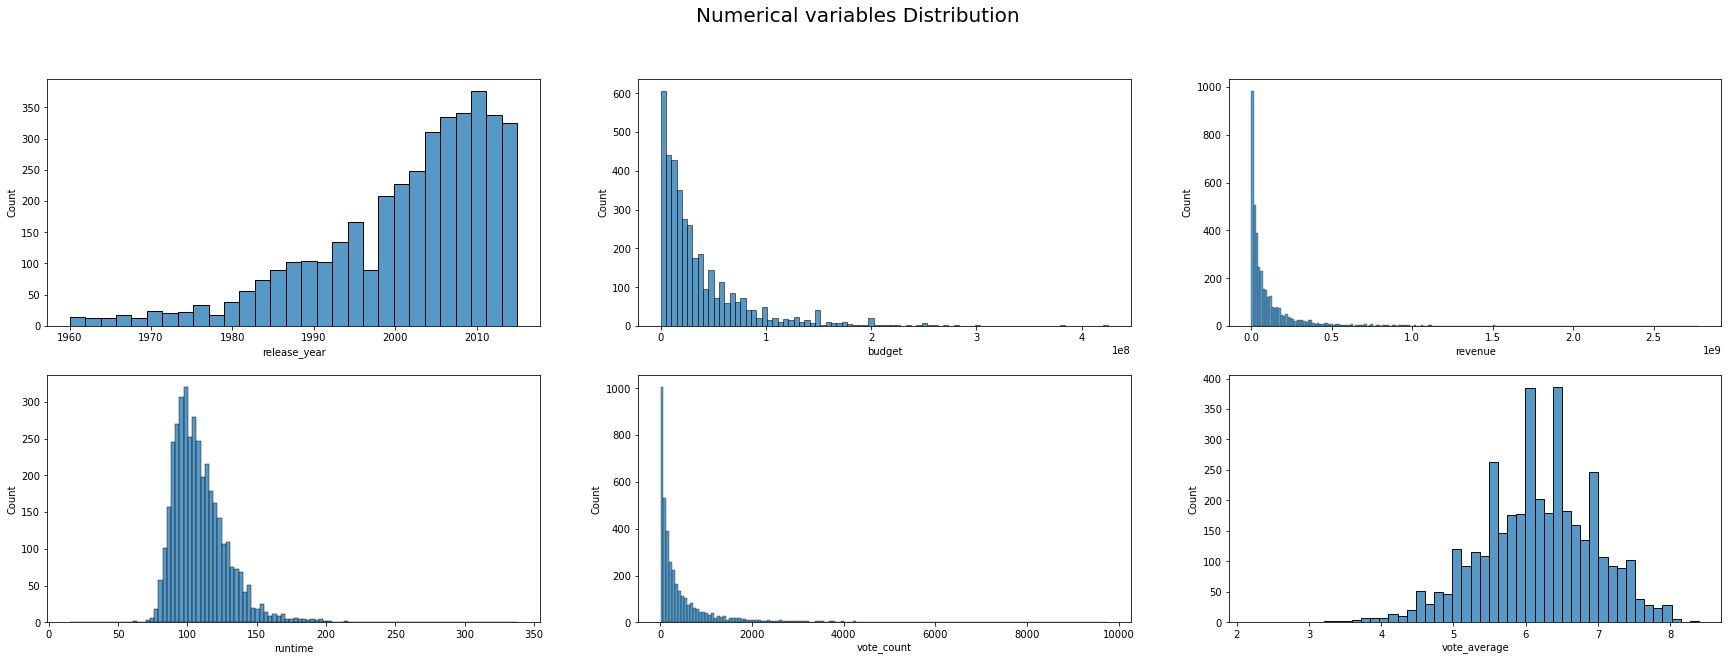

In [23]:
#Make the histogram plot for all numerical variables
fig, axes = plt.subplots(2, 3, figsize=(30, 10))
fig.suptitle('Numerical variables Distribution', size=20)

sns.histplot(ax=axes[0, 0], data=df_raw['release_year'])
sns.histplot(ax=axes[0, 1], data=df_raw['budget'])
sns.histplot(ax=axes[0, 2], data=df_raw['revenue'])
sns.histplot(ax=axes[1, 0], data=df_raw['runtime'])
sns.histplot(ax=axes[1, 1], data=df_raw['vote_count'])
sns.histplot(ax=axes[1, 2], data=df_raw['vote_average']);

- Release_year distribution: Number of movies is increasing rapidly after 20th century.
- Budget distribution: Most of the movie budget is below 100M. Highly skewed ro the right.
- Revenue distribution: Most of the movie revenue is below 500M. Heavily skewed ro the right.
- Runtime: lightly skewed to the right, most of the movie length is around 100min.
- Vote count: most of the movie got below 2000 votes. Heavily skewed ro the right.
- Vote_average: the distribution of the vote score is lightly on bell-shape curve. That's interesting.

### Q2. How many movies has been commercially successful in this dataset?

In [24]:
#Enrich the dataset by adding "profit" column = "budget" - "revenue"
df_raw['profit'] = df_raw['revenue'] - df_raw['budget']
#Enrich the dataset by adding "gross_margin" column = ("revenue"-"budget")/"budget". The more positive percentage, the more ROI of the movie
df_raw['gross_margin'] = (df_raw['revenue'] - df_raw['budget'])/df_raw['budget']*100
df_raw.head()

,budget,revenue,original_title,cast,director,tagline,runtime,genres,vote_count,vote_average,release_year,profit,gross_margin
0,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,The park is open.,124,Action|Adventure|Science Fiction|Thriller,5562,6.5,2015,1363528810,909.019207
1,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,What a Lovely Day.,120,Action|Adventure|Science Fiction|Thriller,6185,7.1,2015,228436354,152.290903
2,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,One Choice Can Destroy You,119,Adventure|Science Fiction|Thriller,2480,6.3,2015,185238201,168.398365
3,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,Every generation has a story.,136,Action|Adventure|Science Fiction|Fantasy,5292,7.5,2015,1868178225,934.089113
4,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,Vengeance Hits Home,137,Action|Crime|Thriller,2947,7.3,2015,1316249360,692.762821


- A successful movie in term of commerciality, the gross margin is approximately 200% which means got double from the investment (budget). Let's have a look which movies on this top-notch list.

In [25]:
df_commercial_success = df_raw.query('gross_margin >=200')
df_commercial_success.head
print(f" There are {df_commercial_success.shape[0]} movies has the profit margin larger than 200% and it takes {(df_commercial_success.shape[0]/len(df_raw)*100)} percent of the whole dataset.")

 There are 1405 movies has the profit margin larger than 200% and it takes 36.45563051375195 percent of the whole dataset.


### Q3. Which are top 10 directors who frequently directed successful movies?

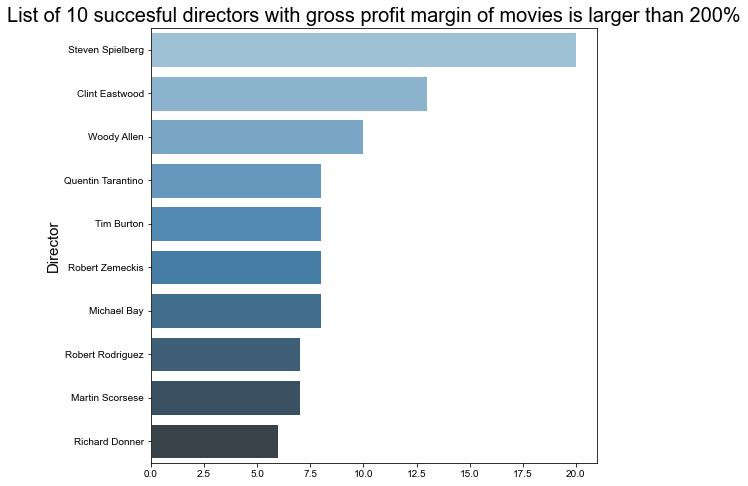

In [26]:
#Top 10 sucessfull directors in term of commerciality. 
success_director = df_commercial_success.groupby('director')['original_title'].count().sort_values(ascending=False)
fig, axes = plt.subplots(figsize=(8, 8))
sns.set_style('darkgrid')
sns.barplot(y=success_director[:10].index, x=success_director[:10].values, palette='Blues_d')
axes.set_title("List of 10 succesful directors with gross profit margin of movies is larger than 200%", size=20),
axes.set_ylabel("Director", size=15);

- If I want to make a next profitable blockbuster movie, these directors are absolutely in my list of choice. They have directed a lot of movies in which the ROI is tremendous successful. 

### Q4. Which are top 10 movies in term of revenue?

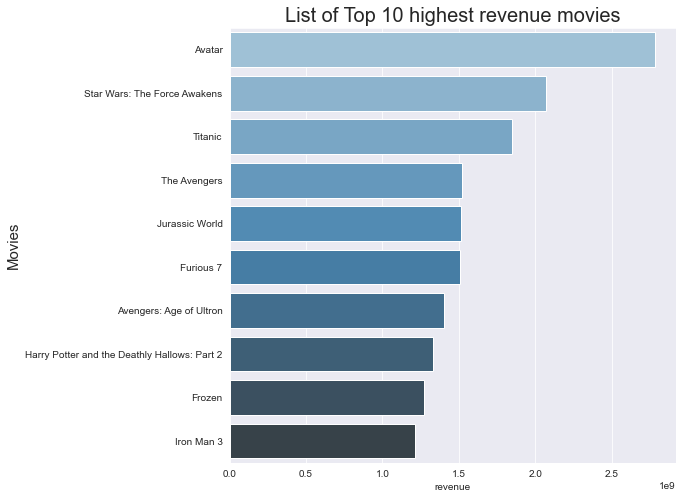

In [27]:
#Top 10 sucessfull movies in term of commerciality. 
df_sorted_by_revenue = df_commercial_success.sort_values('revenue', ascending=False)

#Make the bar plot in seaborn to show top 10 movies in revenue.
fig, axes = plt.subplots(figsize=(8, 8))
sns.set_style('darkgrid')
sns.barplot(y=df_sorted_by_revenue['original_title'][:10], x=df_sorted_by_revenue['revenue'][:10], palette='Blues_d')
axes.set_title("List of Top 10 highest revenue movies", size=20),
axes.set_ylabel("Movies", size=15);

- All these blockbusters of the Hollywood have made more than 1B revenue in box-office. That's a heap of money. 

### Q5. How is typically the runtime of successful movies? 

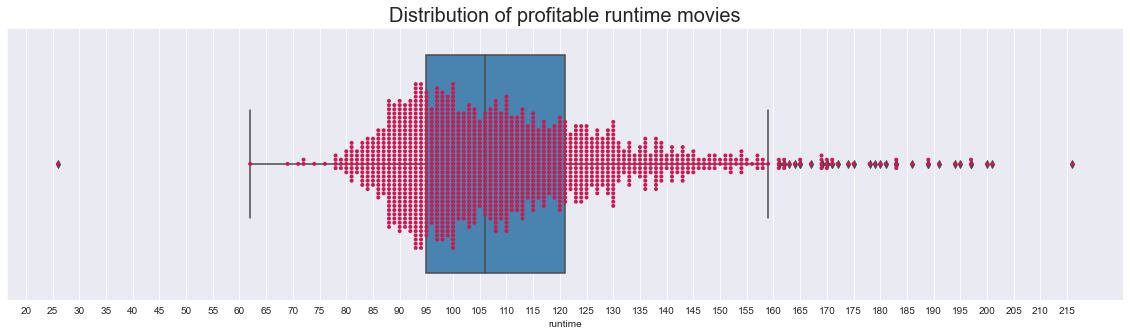

In [28]:
# As we have been awared of this dataset, most of the movie length is around 100min. Let's figure out how long the major number of profitable movies would be.
fig, axes = plt.subplots(figsize=(20, 5))
axes = sns.boxplot(x='runtime', data=df_commercial_success, palette='Blues_d')
axes = sns.swarmplot(x='runtime', data=df_commercial_success, palette='rocket_r', color=".25", size=4)
axes.set_xticks(np.arange(20,220,5))
axes.set_title("Distribution of profitable runtime movies", size=20);

- 75% sucessful movie is below 122min and the highest numbers of movies is on 94min. Therefore, I would consider the profitable one in within this range. 
- I have asked a friend of mine who is a financial cinebox's chain manager here in Ho Chi Minh City, Vietnam. He said that this range of runtime 94-122min is one the of best time frame to maximize the number of schedules. That's reason why they will generate a big amount of money in the box-office.

### Q6. Which year does have the highest number of successful movies release?

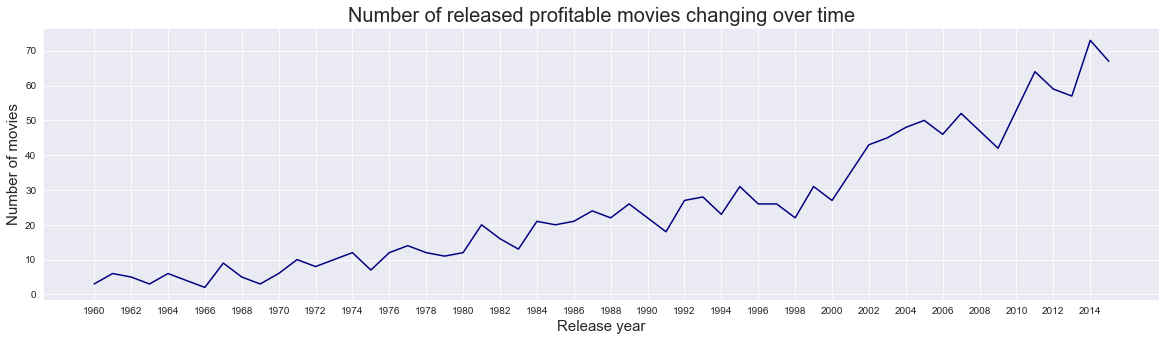

In [29]:
# Group by release year and count how many movies is changing over time.
fig, axes = plt.subplots(figsize=(20, 5))
df_commercial_success.groupby('release_year')['original_title'].count().plot(kind='line', color="navy")
axes.set_xticks(np.arange(1960,2015,2))
axes.set_title("Number of released profitable movies changing over time", size=20)
axes.set_ylabel("Number of movies", size=15)
axes.set_xlabel("Release year", size=15);

- The movie industry is getting more profitable movies over time on overall trend. The peak year is in 2014 in which there are 70 commercial success movies were made. That indicates the movie industry will be a promising field to get the investment in the future.

### Q7. What are the top frequent genres were made? And How is the financial performance of the genres?

In [30]:
# split genres string, at |, explode the list to rows
genres_df = df_commercial_success.assign(genres=df_commercial_success['genres'].str.split('|')).explode('genres')
genres_df.head(10)

,budget,revenue,original_title,cast,director,tagline,runtime,genres,vote_count,vote_average,release_year,profit,gross_margin
0,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,The park is open.,124,Action,5562,6.5,2015,1363528810,909.019207
0,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,The park is open.,124,Adventure,5562,6.5,2015,1363528810,909.019207
0,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,The park is open.,124,Science Fiction,5562,6.5,2015,1363528810,909.019207
0,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,The park is open.,124,Thriller,5562,6.5,2015,1363528810,909.019207
3,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,Every generation has a story.,136,Action,5292,7.5,2015,1868178225,934.089113
3,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,Every generation has a story.,136,Adventure,5292,7.5,2015,1868178225,934.089113
3,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,Every generation has a story.,136,Science Fiction,5292,7.5,2015,1868178225,934.089113
3,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,Every generation has a story.,136,Fantasy,5292,7.5,2015,1868178225,934.089113
4,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,Vengeance Hits Home,137,Action,2947,7.3,2015,1316249360,692.762821
4,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,Vengeance Hits Home,137,Crime,2947,7.3,2015,1316249360,692.762821


In [31]:
#Which genres is most directed?
genres_pct_count = genres_df['genres'].value_counts(normalize=True)*100
genres_pct_count

Drama              15.780731
Comedy             14.451827
Thriller           11.157254
Action              9.994463
Adventure           7.613511
Romance             6.838317
Crime               5.647841
Horror              5.481728
Science Fiction     4.844961
Family              4.706534
Fantasy             3.488372
Mystery             3.045404
Animation           2.353267
Music               1.605759
War                 1.107420
History             0.885936
Documentary         0.526024
Western             0.415282
Foreign             0.027685
TV Movie            0.027685
Name: genres, dtype: float64

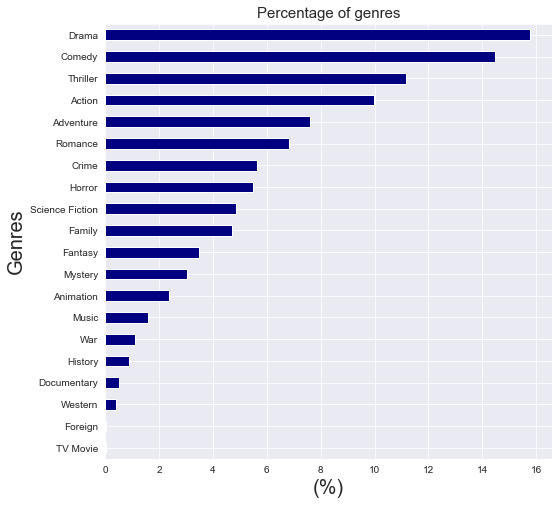

In [32]:
# Plot the barchart of the percentage of movie genres appeared
fig, axes = plt.subplots(figsize=(8, 8))
genres_pct_count.sort_values().plot(kind='barh', color="navy")
axes.set_title("Percentage of genres", size=15)
axes.set_ylabel("Genres", size=20)
axes.set_xlabel("(%)", size=20);

- Drama (15.78%), Comedy (14.45%), Thriller (11.15%) are the top 3 genres are being made and take 41.38% in total number.

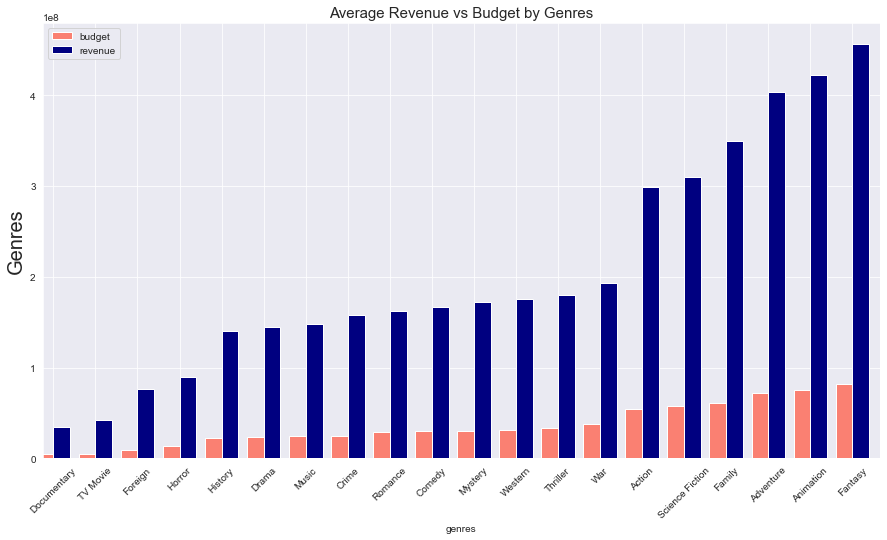

In [33]:
#Calculate the average budget/revenue of each genres
avg_genres_revenue = genres_df.groupby('genres')['revenue'].mean().sort_values(ascending=True)
avg_genres_budget = genres_df.groupby('genres')['budget'].mean().sort_values(ascending=True)

#Plot double bar chart for both average values
fig = plt.figure(figsize=(15,8))
axes = fig.add_subplot(111) 
width = 0.4

avg_genres_budget.plot(kind='bar', color='salmon', ax=axes, width=width, position=1)
avg_genres_revenue.plot(kind='bar', color='navy', ax=axes, width=width, position=0)

axes.set_title("Average Revenue vs Budget by Genres", size=15)
axes.set_ylabel("Genres", size=20)
plt.xticks(rotation = 45)
plt.legend();

- The bar chart clearly show that the more budget the more revenue in return. Fantasy has the largest average revenue (almost 500M); however, this genre also consumes alot of the budget to make it.
- Interestingly, my pre-perception is that animation movie has no cast-acting involved in the movie therefore the budget could be lower than others. However, the budget for this one stay on the second place but still can generate a big amount of revenue (more than 400M).
- As we know drama, comedy & thriller are the top frequent genres made, but the revenue of them is not of the top 3 in term of revenue and budget.

### Q8. What are the top 10 frequent casts? And How is the financial performance of them?

In [34]:
# split cast string, at |, explode the list to rows
cast_df = df_commercial_success.assign(cast=df_commercial_success['cast'].str.split('|')).explode('cast')
cast_df.head(10)

,budget,revenue,original_title,cast,director,tagline,runtime,genres,vote_count,vote_average,release_year,profit,gross_margin
0,150000000,1513528810,Jurassic World,Chris Pratt,Colin Trevorrow,The park is open.,124,Action|Adventure|Science Fiction|Thriller,5562,6.5,2015,1363528810,909.019207
0,150000000,1513528810,Jurassic World,Bryce Dallas Howard,Colin Trevorrow,The park is open.,124,Action|Adventure|Science Fiction|Thriller,5562,6.5,2015,1363528810,909.019207
0,150000000,1513528810,Jurassic World,Irrfan Khan,Colin Trevorrow,The park is open.,124,Action|Adventure|Science Fiction|Thriller,5562,6.5,2015,1363528810,909.019207
0,150000000,1513528810,Jurassic World,Vincent D'Onofrio,Colin Trevorrow,The park is open.,124,Action|Adventure|Science Fiction|Thriller,5562,6.5,2015,1363528810,909.019207
0,150000000,1513528810,Jurassic World,Nick Robinson,Colin Trevorrow,The park is open.,124,Action|Adventure|Science Fiction|Thriller,5562,6.5,2015,1363528810,909.019207
3,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford,J.J. Abrams,Every generation has a story.,136,Action|Adventure|Science Fiction|Fantasy,5292,7.5,2015,1868178225,934.089113
3,200000000,2068178225,Star Wars: The Force Awakens,Mark Hamill,J.J. Abrams,Every generation has a story.,136,Action|Adventure|Science Fiction|Fantasy,5292,7.5,2015,1868178225,934.089113
3,200000000,2068178225,Star Wars: The Force Awakens,Carrie Fisher,J.J. Abrams,Every generation has a story.,136,Action|Adventure|Science Fiction|Fantasy,5292,7.5,2015,1868178225,934.089113
3,200000000,2068178225,Star Wars: The Force Awakens,Adam Driver,J.J. Abrams,Every generation has a story.,136,Action|Adventure|Science Fiction|Fantasy,5292,7.5,2015,1868178225,934.089113
3,200000000,2068178225,Star Wars: The Force Awakens,Daisy Ridley,J.J. Abrams,Every generation has a story.,136,Action|Adventure|Science Fiction|Fantasy,5292,7.5,2015,1868178225,934.089113


In [35]:
# Top 10 frequent casts
cast_df['cast'].value_counts()

Tom Hanks            21
Tom Cruise           19
Robert De Niro       18
Samuel L. Jackson    17
Clint Eastwood       15
                     ..
Steve Huison          1
Eugene Byrd           1
Ben Mendelsohn        1
Esther Wurmfeld       1
JoJo Kushner          1
Name: cast, Length: 3790, dtype: int64

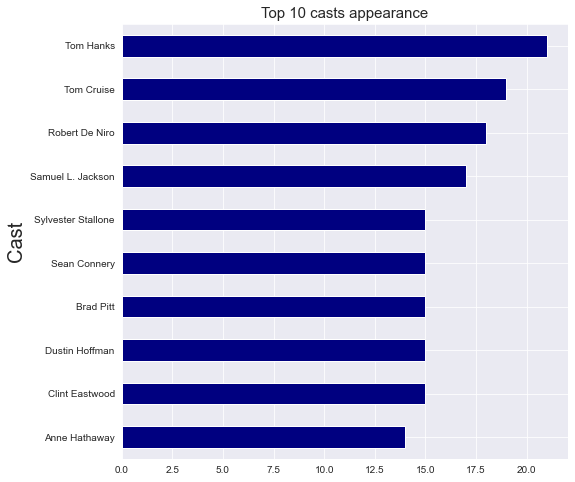

In [36]:
#Plot the top 10 frequent casts
fig, axes = plt.subplots(figsize=(8, 8))
cast_count = cast_df['cast'].value_counts()
cast_count.iloc[:10].sort_values(ascending=True).plot(kind='barh', color="navy")
axes.set_title("Top 10 casts appearance", size=15)
axes.set_ylabel("Cast", size=20);


In [37]:
# Convert the series to the list to subset them in the dataframe
most_demand_cast = cast_count.index[:10]
list(most_demand_cast)

['Tom Hanks',
 'Tom Cruise',
 'Robert De Niro',
 'Samuel L. Jackson',
 'Clint Eastwood',
 'Dustin Hoffman',
 'Brad Pitt',
 'Sean Connery',
 'Sylvester Stallone',
 'Anne Hathaway']

In [44]:
### another way to subset rows with a series
selected_cast = list(most_demand_cast)
ten_most_demend_cast_query = cast_df.query('cast in @selected_cast')
ten_most_demend_cast_query


,budget,revenue,original_title,cast,director,tagline,runtime,genres,vote_count,vote_average,release_year,profit,gross_margin
15,44000000,155760117,The Hateful Eight,Samuel L. Jackson,Quentin Tarantino,No one comes up here without a damn good reason.,167,Crime|Drama|Mystery|Western,2389,7.4,2015,111760117,254.000266
24,28000000,133346506,The Big Short,Brad Pitt,Adam McKay,This is a true story.,130,Comedy|Drama,1545,7.3,2015,105346506,376.237521
25,150000000,682330139,Mission: Impossible - Rogue Nation,Tom Cruise,Christopher McQuarrie,Desperate Times. Desperate Measures.,131,Action,2349,7.1,2015,532330139,354.886759
27,81000000,403802136,Kingsman: The Secret Service,Samuel L. Jackson,Matthew Vaughn,Manners maketh man.,130,Crime|Comedy|Action|Adventure,3833,7.6,2015,322802136,398.521156
33,40000000,162610473,Bridge of Spies,Tom Hanks,Steven Spielberg,"In the shadow of war, one man showed the world...",141,Thriller|Drama,1638,7.1,2015,122610473,306.526183
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10596,500000,3000000,Mean Streets,Robert De Niro,Martin Scorsese,You don't make up for your sins in church. You...,110,Drama|Crime,141,7.1,1973,2500000,500.000000
10608,12000000,53267000,Papillon,Dustin Hoffman,Franklin J. Schaffner,Not just a Great Escape. It was the Greatest.,151,Crime|Drama,191,7.4,1973,41267000,343.891667
10689,11000000,141195658,Thunderball,Sean Connery,Terence Young,Look up! Look down! Look out!,130,Adventure|Action|Thriller,331,6.3,1965,130195658,1183.596891
10727,3600000,44785053,Midnight Cowboy,Dustin Hoffman,John Schlesinger,Whatever you hear about Midnight Cowboy is true.,113,Drama,124,7.0,1969,41185053,1144.029250


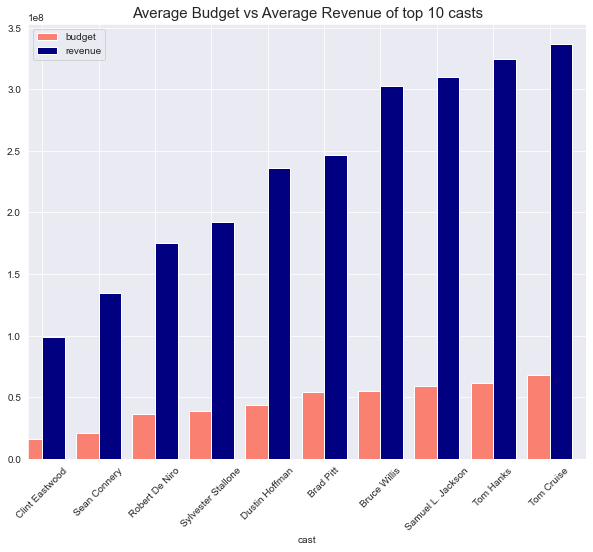

In [37]:
#Subset rows in dataframe where top 10 most frequent casts
ten_most_demend_cast = cast_df[cast_df['cast'].isin(['Tom Hanks',
 'Tom Cruise',
 'Robert De Niro',
 'Samuel L. Jackson',
 'Sylvester Stallone',
 'Clint Eastwood',
 'Brad Pitt',
 'Dustin Hoffman',
 'Sean Connery',
 'Bruce Willis'])]

#Make a double bar chart to show the average budget vs average revenue of each cast they have acted in. 
avg_revenue = ten_most_demend_cast.groupby(['cast'])['revenue'].mean().sort_values(ascending=True)
avg_budget = ten_most_demend_cast.groupby(['cast'])['budget'].mean().sort_values(ascending=True)

fig = plt.figure(figsize=(10,8))
axes = fig.add_subplot(111) 
width = 0.4

avg_budget.plot(kind='bar', color='salmon', ax=axes, width=width, position=1)
avg_revenue.plot(kind='bar', color='navy', ax=axes, width=width, position=0)

axes.set_title("Average Budget vs Average Revenue of top 10 casts", size=15)
plt.xticks(rotation = 45)
plt.legend();

- Although Tom Hanks is the most in demand actor by showing in 21 movies, he just placed on the 2nd in term of average revenue/budget movies where he is. The top super expensive star is Tom Cruise whose movies are on top of budget and revenue. Clint Eastwood is also contributed to the top 10 movie stars. Interestingly, in this list has no actress.

### Q9. How do the vote average score and vote count relate to the revenue of the movies?

In [38]:
#Find the descriptive statistics of vote_average score of the dataset
df_commercial_success['vote_average'].describe()

count    1405.000000
mean        6.477936
std         0.745985
min         3.400000
25%         6.000000
50%         6.500000
75%         7.000000
max         8.400000
Name: vote_average, dtype: float64

- To be better analyzing, we divide the vote average score into 3 groups based on the quartiles. Low_Score: 3.4-6, Medium_Score: 6-7, High_Score: 7-8.4

In [39]:
# Import warnings to ignore any warning after running the 'cut' method. 
import warnings
warnings.filterwarnings('ignore')

# Divide the vote score into 3 labels and make a nem column named "vote_score" to catergorize them.
vote_labels = ['Low_Score', 'Medium_Score', 'High_Score']
vote_bins = [0, 3.4, 6, 8.4]
df_commercial_success['vote_score'] = pd.cut(df_commercial_success['vote_average'], bins=vote_bins, labels=vote_labels)

In [40]:
# How many movies got Medium to High Score 
df_commercial_success['vote_score'].value_counts()

High_Score      1017
Medium_Score     387
Low_Score          1
Name: vote_score, dtype: int64

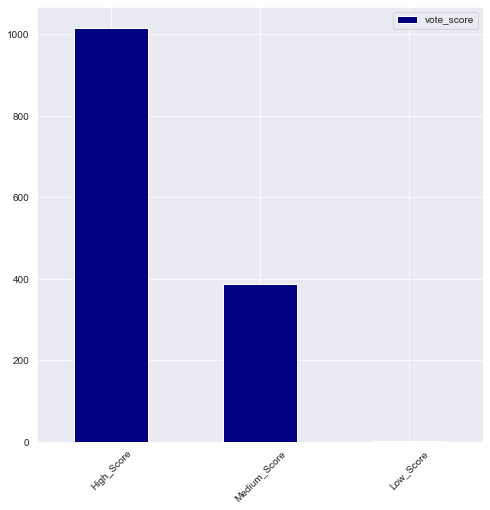

In [41]:
# Plot the bar chart to see how many moives are in each group
fig, axes = plt.subplots(figsize=(8, 8))
df_commercial_success['vote_score'].value_counts().plot(kind='bar', color="navy")
plt.xticks(rotation=45)
plt.legend();

- In this commercial succesful dataset, most of the moives got the high score & medium score from people with about 1400 movies.

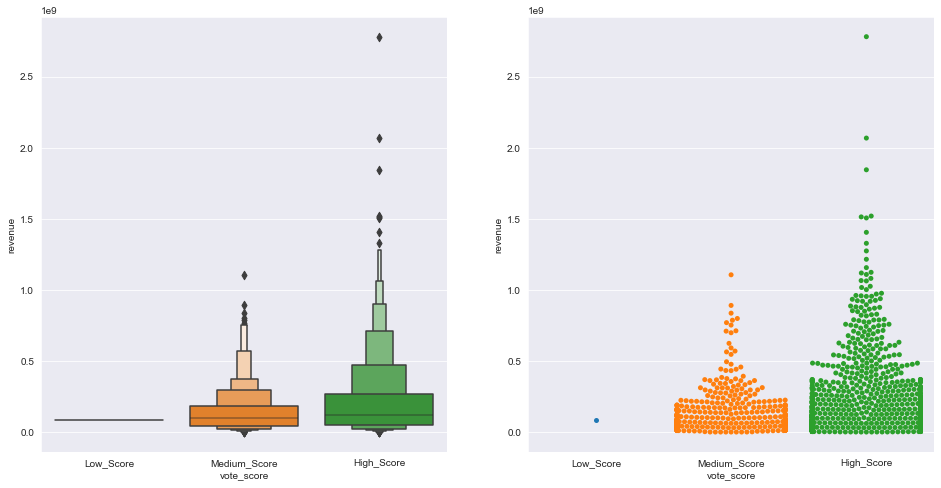

In [42]:
# Plot distribution of revenue over the vote score for better understanding how vote score positively relate to each other.
fig, axes = plt.subplots(figsize=(16, 8), ncols=2)
sns.boxenplot(y=df_commercial_success['revenue'], x=df_commercial_success['vote_score'], ax=axes[0])
sns.swarmplot(y=df_commercial_success['revenue'], x=df_commercial_success['vote_score'], ax=axes[1]);

- Most the movie with medium score are below 250M. On the other hand, the revenue of high score movies are largely distributed up to 500M and has more outliers where the revenue can reach up more than 2.5B.

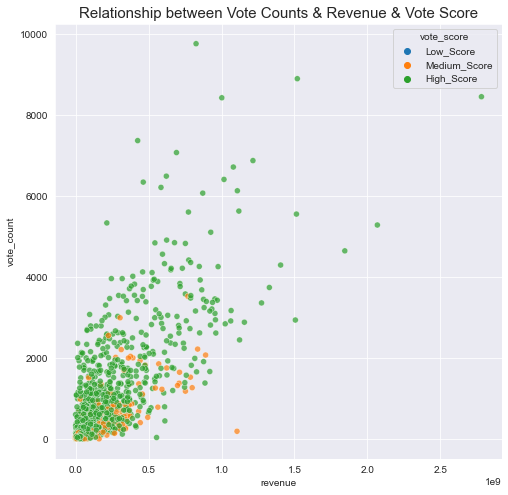

In [43]:
# Plot the scatter plot between vote_count, revenue and vote_score
fig, axes = plt.subplots(figsize=(8, 8))
axes = sns.scatterplot(x='revenue', y='vote_count', data=df_commercial_success, hue='vote_score', alpha=0.7)
axes.set_title("Relationship between Vote Counts & Revenue & Vote Score", size=15);

- The scatter plot show that there is a strong positive relationship between the number of vote count and revenue.

#### Correlation Matrix

In [44]:
# Calculate the correlation matrix of the successful movies
corr = df_commercial_success.corr()
corr

,budget,revenue,runtime,vote_count,vote_average,release_year,profit,gross_margin
budget,1.000000,0.847148,0.339160,0.675210,0.106634,0.343133,0.781129,-0.022732
revenue,0.847148,1.000000,0.338784,0.748199,0.187906,0.255682,0.993495,-0.010385
runtime,0.339160,0.338784,1.000000,0.367634,0.411328,-0.084470,0.325402,0.002709
vote_count,0.675210,0.748199,0.367634,1.000000,0.410295,0.296781,0.734465,-0.016593
vote_average,0.106634,0.187906,0.411328,0.410295,1.000000,-0.114935,0.197946,-0.026461
release_year,0.343133,0.255682,-0.084470,0.296781,-0.114935,1.000000,0.226902,-0.026534
profit,0.781129,0.993495,0.325402,0.734465,0.197946,0.226902,1.000000,-0.007332
gross_margin,-0.022732,-0.010385,0.002709,-0.016593,-0.026461,-0.026534,-0.007332,1.000000


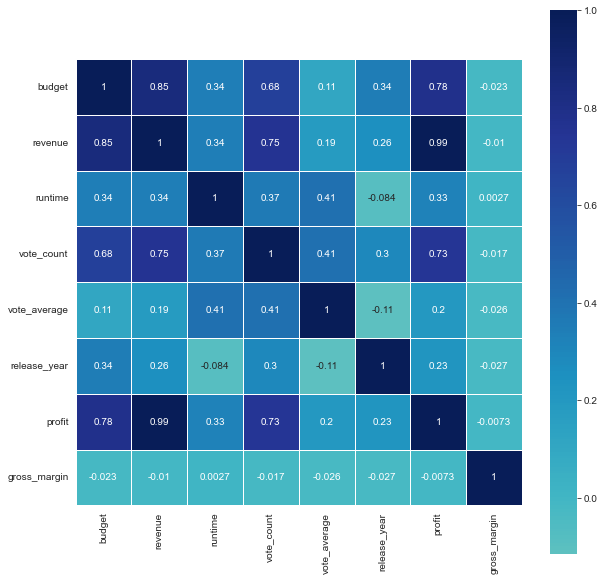

In [45]:
fig, axes = plt.subplots(figsize=(10, 10))

axes = sns.heatmap(corr, annot=True, center=0,  linewidths=1, square=True, cmap="YlGnBu")

- The correlation matrix has shown us that revenue is strongly positive correlated to vote_count & budget. Although the correlation has indicated no strong relation between revenue and vote_average, the distribution of the data as above analysis has shown us the most successful movies got a High Score in average. 

### Q10. What are words most used in tagline?

In [46]:
# Let's install the packages WordCloud: pip install WordCloud;
# Import necessary packages from world cloud to use
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [47]:
# Drop any null values in the tagline columns due to the world cloud is unable to plot with null data
df_tagline_non_na= df_commercial_success['tagline'].dropna()
df_tagline_non_na.isnull().sum()

0

In [48]:
# Convert the tagline into string and join them all together
word_string=" ".join(str(x) for x in df_tagline_non_na)

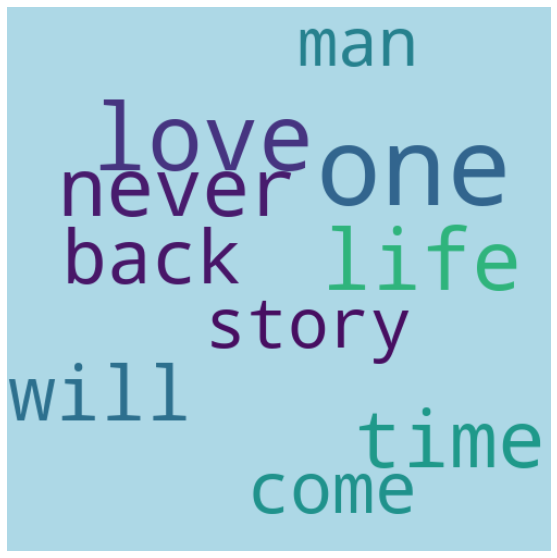

In [49]:
# Plot the world cloud to find the top 10 words mostly used to write in the tagline.
plt.figure(figsize=(10,10))
wc = WordCloud(background_color="lightblue", stopwords = STOPWORDS, max_words=10, max_font_size= 100,  width=500, height=500)
wc.generate(word_string)

plt.imshow(wc.recolor( colormap= 'viridis' , random_state=7), interpolation="bilinear")
plt.axis('off');

- Would you consider make the next succesful movie with this combination of word for tagline? 
- Guest what next succesful movie content is: 
>"one man life time story will never come back love"

### Limitation:
- To analyze in the aspects of budget & revenue, we need both of data available. However, there are either zero revenue & budget data therefore a large number of data is dropped out.
- There are a couple of movies in which runtime is zero. That’s possibly not a right value. 
- There are a couple of null data especially on tagline columns where the movies have no hooked sentences. That could be a drawback of this dataset as analyzing the frequent of words used in tagline.
- The cast & genres columns have the pipe (|) separator that needed to be took out to get the list of cast and genres for analysis.

<a id='conclusion'></a>
# Conclusion
-	A successful commercial movie has at least 200% in gross margin where there are more than 1405 one to meet this criteria. 
-	Clint Eastwood is both one of the best director and cast in movies he is in. Steven Spielberg is the supper rock star when he has made 20 movies with gross margin bigger than 200%. We definitely consider to hire these most talent directors to direct the next blockbuster.
-	Avatar has the biggest number of revenue with more than 2.5B. That has not been beat by any movies yet. The runner up is Star Wars: The Force Awakens but it is still far below around 500M compared to super blockbuster Avatar. Interestingly, Director James Cameron owns 2 movies (Avatar & Titanic) in the top 10 revenue movies, but Steven Spielberg is the one who has the highest number of successful one.
-	The final cut for a movie is in range from 94-122min. That is where the most successful movies are. That’s also a preference for the post-production process. 
-	Drama, Comedy, Thriller are the top 3 genres have been made, however, they are not commercially profitable compared to Fantasy, Animation and Adventure where they generate a heap of revenue in average. 
-	Tom Cruise and Tom Hanks are 2 super stars because movies in which those generate a lot of revenue. The top 10 casts have no female. That’s interesting point in the film industry. 
-	A strong positive correlation for the vote count and vote score to the revenue. The more public votes criticize positively, the more revenue that the movie have. 
-	The final word cloud in tag line give us the sense of which words in the hooked line in order to catch the attention for the movie which is “one man life time story will never come back love”.   


#### Reference
- https://stackoverflow.com/questions/10880813/typeerror-sequence-item-0-expected-string-int-found
- https://www.kaggle.com/code/olgaberezovsky/word-cloud-using-python-pandas/notebook